# Single Layer Perceptron

### Importing Necessary Libraries

In [1]:
import numpy
import pandas
from sklearn.utils import shuffle
from matplotlib import pyplot

### Studying the data

We try to get more info on what the dataset is providing in terms of features and what classes are we supposed to predict.

In [2]:
url_to_csv = "wine.csv"

data = pandas.read_csv(url_to_csv)

In [3]:
data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensitys,Hue,OD280/OD315 of diluted wines,Proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [4]:
data.columns.values

array(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensitys', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline', 'label'], dtype=object)

In [5]:
data[data.columns.values[:-1]].corr()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensitys,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color intensitys,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [6]:
numpy.random.seed(23)
data = data.sample(frac=1)

print(data.iloc[:, -1].value_counts())

label
2    71
1    59
3    48
Name: count, dtype: int64


### Designing a Perceptron

Notations:-
- Input Size - _m_
- Input Features - _X_
- Desired Classes - _D_
- Predicted Classes - _Y_
- Weights - _wts_ (initialized to zero)
- eta - $\eta$
- Induced Field, $\nu = \sum_0^m W^T X $
- Activation Function is *Unipolar Binary Threshold* <br/> 
$ y = \begin{cases} \text{1,} & \nu \gt 0 \\ \text{0, } & \nu \leq 0 \end{cases}$ 



In [7]:
class Perceptron:

    def __init__(self, m: int, eta: int):
        # Initializing Hyperparameters
        self.m = m
        self.eta = eta

        # Initializing weights
        self.wts = numpy.zeros(1 + self.m)

    def unipolar_activation(self, v: numpy.number) -> numpy.number:
        return 1 if v >= 0 else 0

    def prepend_bias(self, x: numpy.array) -> numpy.array:
        return numpy.insert(x, 0, 1)

    def predict(self, X: numpy.array) -> numpy.array:

        # Prepending bias
        xi_bias = self.prepend_bias(X)

        # Linear Combiner
        v = self.wts.T.dot(xi_bias)
        
        # Activation
        y = self.unipolar_activation(v)
        
        # Return y
        return y
    
    def test(self, X: numpy.ndarray, D: numpy.array) -> numpy.array:

        # Y_pred = []

        for xi in X:
            y = self.predict(xi)
            Y_pred.append(y)

        Y_pred = numpy.array(Y_pred)

        # error = D - Y_pred
        # accuracy = numpy.sum(error) / error.shape[0]
        # print(f"Accuracy: {accuracy}")

        return Y_pred

    def train(self, X: numpy.ndarray, D: numpy.ndarray):
        
        error_sum = 0

        for xi, d in zip(X, D):
            
            # Prepend bias
            xi_bias = self.prepend_bias(xi)

            # Predict with existing weights
            y = self.predict(xi)

            # Error = desired - actual
            error = d - y

            # Calculating change in weights
            delta_w = self.eta * error * xi_bias

            # Updating wts
            self.wts = self.wts + delta_w

            error_sum += error

        return error_sum
            # print(f"ep={ep}, wts = {self.wts}, error = {error}")

#### Designing a Single Layer Perceptron

A single layer perceptron is nothing but list of one or more perceptrons.

In addition to input neurons and learning rate, we also take no. of perceptrons in the layer as a parameter.

In [8]:
class SLP:

    def __init__(self, m: int, n: int, eta: int):
        self.n = n
        self.perceptrons = [Perceptron(m, eta) for _ in range(n)]

    def train(self, X: numpy.ndarray, D: numpy.ndarray, X_val: numpy.ndarray = None, D_val: numpy.ndarray = None, epochs: int = 1):
        errors = numpy.zeros(epochs)
        acc = []

        for ep in range(epochs):

            X_shuff, D_shuff = shuffle(X, D, random_state=0)

            for i in range(self.n):
                errors[ep] += numpy.abs(self.perceptrons[i].train(X_shuff, D_shuff[:, i]))
                # print(f"i={i} : Wts = {self.perceptrons[i].wts}")

            # if X_val != None and D_val != None:
            Y_pred = self.test(X_val)
            accuracy = self.accuracy(D_val, Y_pred)
            acc.append(accuracy)

            # print(f"{ep} ")

        errors = errors / D.shape[0]

        return errors, acc

    def predict(self, x: numpy.array) -> numpy.array:
        return [percep.predict(x) for percep in self.perceptrons]
    
    def test(self, X: numpy.ndarray) -> numpy.array:
        Y_pred = []
        for xi in X:
            y = self.predict(xi)
            Y_pred.append(y)
        return numpy.array(Y_pred)

    def accuracy(self, D: numpy.ndarray, Y: numpy.ndarray):
        
        corr_pred = 0
        for d, y in zip(D, Y):
            if numpy.argmax(d) == numpy.argmax(y):
                corr_pred += 1
        
        acc = corr_pred / D.shape[0]

        return acc   
        

#### Implementing Perceptron to the dataset

##### Encoding data using One Hot Encoding

In [9]:
desired_outputs = pandas.get_dummies(data.iloc[:, -1], dtype=int)
labels = desired_outputs.columns.values

print(f"Labels : {labels}")
print(desired_outputs)

Labels : [1 2 3]
     1  2  3
162  0  0  1
30   1  0  0
174  0  0  1
145  0  0  1
72   0  1  0
..  .. .. ..
39   1  0  0
91   0  1  0
31   1  0  0
40   1  0  0
83   0  1  0

[178 rows x 3 columns]


#### Creating train and test set

We are splitting out data using a parameter `split_ratio`. 

In [10]:
split_ratio = 0.3

input_features = data.iloc[:, :-1]

k = int(input_features.shape[0] * split_ratio)

train_x, train_y = input_features[:-k], desired_outputs[:-k]
test_x, test_y = input_features[-k:], desired_outputs[-k:]

### Defining our Hyperparameters

Here we fix our hyper parameters such as $\eta$ (eta), epochs, etc.

In [11]:
ETA = 0.1
EPOCHS = 100

#### Training our SLP

In [12]:
s = SLP(train_x.shape[1], train_y.shape[1], ETA)
errs, acc = s.train(train_x.to_numpy(), train_y.to_numpy(), test_x.to_numpy(), test_y.to_numpy(), epochs=EPOCHS)

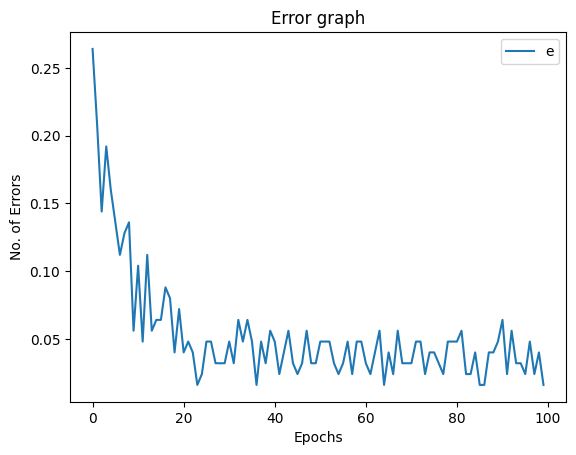

In [13]:
# pyplot.plot(errs[:, 0], label=labels[0])
# pyplot.plot(errs[:, 1], label=labels[1])
# pyplot.plot(errs[:, 2], label=labels[2])

pyplot.plot(errs, label = "e")

pyplot.title("Error graph")
pyplot.xlabel("Epochs")
pyplot.ylabel("No. of Errors")
pyplot.legend()
pyplot.show()

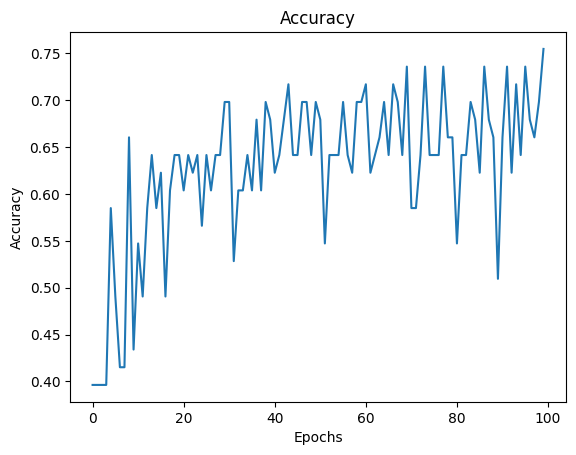

In [14]:
pyplot.plot(acc)

pyplot.title("Accuracy")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.show()

#### Testing and Metrics

In [15]:
Y_pred = s.test(test_x.to_numpy())
print(s.accuracy(test_y.to_numpy(), Y_pred))

# This value should give me output label as 3
x_input = numpy.array([12.87, 4.61, 2.48, 21.5, 86.00, 1.7, 0.65, .47, .86, .765, .54, 1.86, 625.0])
y_pred = s.predict(x_input)
y_pred_idx = numpy.argmax(y_pred)
y_pred_label = labels[y_pred_idx]
print(y_pred)
print(y_pred_label)

0.7547169811320755
[0, 0, 1]
3


#### Visualizing the data

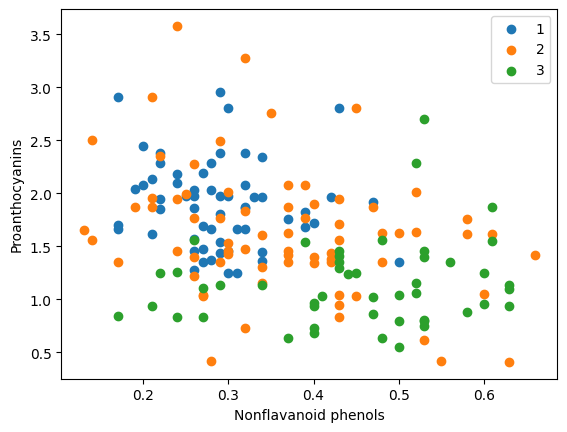

In [16]:
features = data.columns.values[:-1]
target = data.columns.values[-1]

feat_1 = features[7]
feat_2 = features[8]

for i in range(len(labels)):
    label = labels[i]
    
    d = data[data[target] == label]

    x = d[feat_1].to_numpy()
    y = d[feat_2].to_numpy()

    pyplot.scatter(x, y, label = label)

pyplot.xlabel(feat_1)
pyplot.ylabel(feat_2)
pyplot.legend()
pyplot.show()

#### What are the weight values?

In [17]:
print(s.perceptrons[0].wts)
print(s.perceptrons[1].wts)
print(s.perceptrons[2].wts)

[  -30.9        -322.726      -102.655       -61.385      -941.52
 -1580.8           5.939        72.438       -18.309       -23.466
  -199.1359986    -7.149       -12.487       216.8      ]
[  17.          71.724     -187.451        5.003      358.
  647.5         82.207      166.384       -3.339      120.986
 -494.8549956   68.087      198.448     -140.1      ]
[  14.         277.433      375.421       52.314      665.6
   -8.4       -138.449     -340.036       31.808     -128.271
  796.4589903  -77.57      -235.209      -28.5      ]
